In [4]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [2]:
scenarios = []
for gre in [i/100 for i in list(range(2, 10))]:
    for gs in [i/100 for i in list(range(2, 10))]:
        for ps in [100]:
            for ma in list(range(0, 20001, 5000)):
                for ia in list(range(0, 20001, 5000)):
                    scenarios.append(utils.Scenario(utils.RealEstate(4.2e6,
                                                                     utils.Mortgage(0.0305, 3.6e6, 30, 12)),
                                                    utils.Portfolio(), gre, gs, ps, ma, ia))


sim = utils.Simulation(scenarios)

In [3]:
%%time
sim.simulate()

Completed scenario 1224.
CPU times: user 47.6 s, sys: 14.2 s, total: 1min 1s
Wall time: 1min


In [7]:
history = sim.history
totals = sim.profit

In [13]:
history[history.scenario_name=='0.07_0.06_10000_0'].head(10)

,mortgage_amount,price_index,current_price_real_est,interest_amount,capital_downpayment,purchase_price_stocks,current_price_stocks,value_stocks,scenario_name,growth_rate_real_estate,growth_rate_stocks,mortgage_overpayment_amount,investment_amount,month,profit_stocks,cumulative_interest_amount,cumulative_profit_stocks,current_profit_real_estate
163725,3.600000e+06,1.000000,4.200000e+06,9150.000000,16124.995854,100.000000,241.764723,0.0,0.07_0.06_10000_0,0.07,0.06,10000,0,0,0.0,9150.000000,0.0,-9150.000000
163726,3.583875e+06,1.005833,4.224500e+06,9109.015636,16165.980219,100.500000,241.764723,0.0,0.07_0.06_10000_0,0.07,0.06,10000,0,1,0.0,18259.015636,0.0,6240.984364
163727,3.567709e+06,1.011701,4.249143e+06,9067.927102,16207.068752,101.002500,241.764723,0.0,0.07_0.06_10000_0,0.07,0.06,10000,0,2,0.0,27326.942738,0.0,21815.973929
163728,3.551502e+06,1.017602,4.273930e+06,9026.734136,16248.261718,101.507512,241.764723,0.0,0.07_0.06_10000_0,0.07,0.06,10000,0,3,0.0,36353.676874,0.0,37575.906806
163729,3.535254e+06,1.023538,4.298861e+06,8985.436471,16289.559383,102.015050,241.764723,0.0,0.07_0.06_10000_0,0.07,0.06,10000,0,4,0.0,45339.113345,0.0,53521.726240
163730,3.518964e+06,1.029509,4.323938e+06,8944.033841,16330.962014,102.525125,241.764723,0.0,0.07_0.06_10000_0,0.07,0.06,10000,0,5,0.0,54283.147186,0.0,69654.380631
163731,3.502633e+06,1.035514,4.349160e+06,8902.525979,16372.469875,103.037751,241.764723,0.0,0.07_0.06_10000_0,0.07,0.06,10000,0,6,0.0,63185.673165,0.0,85974.823564
163732,3.486261e+06,1.041555,4.374531e+06,8860.912618,16414.083236,103.552940,241.764723,0.0,0.07_0.06_10000_0,0.07,0.06,10000,0,7,0.0,72046.585783,0.0,102484.013843
163733,3.469847e+06,1.047631,4.400049e+06,8819.193490,16455.802364,104.070704,241.764723,0.0,0.07_0.06_10000_0,0.07,0.06,10000,0,8,0.0,80865.779273,0.0,119182.915518
163734,3.453391e+06,1.053742,4.425716e+06,8777.368325,16497.627529,104.591058,241.764723,0.0,0.07_0.06_10000_0,0.07,0.06,10000,0,9,0.0,89643.147598,0.0,136072.497912


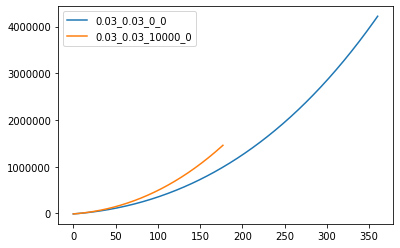

In [21]:
for scenario in ['0.03_0.03_0_0', '0.03_0.03_10000_0']:
    to_plot = history[history.scenario_name==scenario]
    plt.plot(to_plot.month, to_plot.current_profit_real_estate, label=scenario)
plt.legend()
plt.show()

In [ ]:
# where is the break even point at various real estate growth rates (at what point in time the profit from the growth is more than the loss due to interest payments)
# for various periods, with growth real estate on X and growth stocks on Y, what is the profit for various cases
# for various periods, with overpayment real estate on X and investment on Y what is the profit for various cases
# with today's growth rates, what is more profitable - overpayment or investment?